In [2]:
from tqdm import tqdm
!pip install tweepy


In [3]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
from tqdm import tqdm
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from credentials import * 

In [5]:
# def get_all_tweets(screen_name):
# Source: https://gist.github.com/yanofsky/5436496
#Twitter only allows access to a users most recent 3240 tweets with this method

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
api = tweepy.API(auth)

screen_name="KarlTheFog"

#initialize a list to hold all the tweepy Tweets
alltweets = []	

#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name,count=200)



Exploration of the object that is returned.

Resource page:

<img src="tweet_objects.png",width=600,height=600>

Links:

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html


https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object.html

In [6]:
#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print("...%s tweets downloaded so far" % (len(alltweets)))



getting tweets before 972298405979369471
...399 tweets downloaded so far
getting tweets before 913891035318644735
...598 tweets downloaded so far
getting tweets before 892816922944851967
...798 tweets downloaded so far
getting tweets before 866039284817473536
...997 tweets downloaded so far
getting tweets before 808127517953552384
...1196 tweets downloaded so far
getting tweets before 770463637186150399
...1395 tweets downloaded so far
getting tweets before 748921044795133951
...1592 tweets downloaded so far
getting tweets before 710287246012735487
...1790 tweets downloaded so far
getting tweets before 655552301281779711
...1988 tweets downloaded so far
getting tweets before 627251075398045695
...2188 tweets downloaded so far
getting tweets before 597639876175994879
...2385 tweets downloaded so far
getting tweets before 565905311329189887
...2580 tweets downloaded so far
getting tweets before 538040747010699264
...2778 tweets downloaded so far
getting tweets before 517100938855583743
.

In [7]:
n_tweets=len(alltweets)
n_tweets

3174

 Mining the images from the tweets?
 A little help from here: https://miguelmalvarez.com/2015/03/03/download-the-pictures-from-a-twitter-feed-using-python/

In [8]:
media_files = set()
for status in alltweets:
    media = status.entities.get('media', [])
    if(len(media) > 0):
        media_files.add(media[0]['media_url'])

In [10]:
!pip install wget

  Running setup.py bdist_wheel for wget: started
  Running setup.py bdist_wheel for wget: finished with status 'done'
  Stored in directory: C:\Users\vinay\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [11]:
import wget

for media_file in media_files:
    wget.download(media_file)

In [13]:
len(os.listdir(os.path.join(os.getcwd(),'Karl_images_raw/')))

781

Use Clarifai API to remove 'non-Karl' smart alec tweets:

In [14]:
!pip install clarifai --upgrade

  Running setup.py bdist_wheel for clarifai: started
  Running setup.py bdist_wheel for clarifai: finished with status 'done'
  Stored in directory: C:\Users\vinay\AppData\Local\pip\Cache\wheels\16\fc\26\c0db278ccb884dd99443f7e69a1eb213f369177e715d330a80
  Running setup.py bdist_wheel for googleapis-common-protos: started
  Running setup.py bdist_wheel for googleapis-common-protos: finished with status 'done'
  Stored in directory: C:\Users\vinay\AppData\Local\pip\Cache\wheels\22\57\2c\fdf1a5d9f14360bd1123c6dbac26eb784eba25223800239a69
Successfully built clarifai googleapis-common-protos
  Found existing installation: clarifai 2.0.33
    Uninstalling clarifai-2.0.33:
      Successfully uninstalled clarifai-2.0.33


A typical Clarifai response looks like:
```
{'outputs': [{'created_at': '2018-11-12T01:12:44.918222291Z',
   'data': {'concepts': [{'app_id': 'main',
      'id': 'ai_MTvKbKJv',
      'name': 'landscape',
      'value': 0.9868720769882202},
     {'app_id': 'main',
      'id': 'ai_XNxf76KN',
      'name': 'sunset',
      'value': 0.9847521185874939},
     {'app_id': 'main',
      'id': 'ai_lNsKfmXb',
      'name': 'sky',
      'value': 0.9845364093780518},
     {'app_id': 'main',
      'id': 'ai_1d4Qk7Nr',
      'name': 'sun',
      'value': 0.9820173978805542},
     {'app_id': 'main',
      'id': 'ai_ZWrPWjZr',
      'name': 'moon',
      'value': 0.9817983508110046},
     {'app_id': 'main',
      'id': 'ai_n9vjC1jB',
      'name': 'light',
      'value': 0.9759149551391602},
     {'app_id': 'main',
      'id': 'ai_23p8Lb8k',
      'name': 'dusk',
      'value': 0.9665891528129578},
     {'app_id': 'main',
      'id': 'ai_786Zr311',
      'name': 'no person',
      'value': 0.9660860300064087},
     {'app_id': 'main',
      'id': 'ai_PJQHT1jg',
      'name': 'evening',
      'value': 0.9647331237792969},
     {'app_id': 'main',
      'id': 'ai_fHKHwJ4R',
      'name': 'silhouette',
      'value': 0.9565849304199219},
     {'app_id': 'main',
      'id': 'ai_4sJLn6nX',
      'name': 'dark',
      'value': 0.9550071954727173},
     {'app_id': 'main',
      'id': 'ai_lN6KXkcl',
      'name': 'dawn',
      'value': 0.9439393281936646},
     {'app_id': 'main',
      'id': 'ai_J08dm6MS',
      'name': 'astronomy',
      'value': 0.9110841751098633},
     {'app_id': 'main',
      'id': 'ai_9tsK0tsn',
      'name': 'weather',
      'value': 0.9082812070846558},
     {'app_id': 'main',
      'id': 'ai_tBcWlsCp',
      'name': 'nature',
      'value': 0.8888853788375854},
     {'app_id': 'main',
      'id': 'ai_VRmbGVWh',
      'name': 'travel',
      'value': 0.8793880343437195},
     {'app_id': 'main',
      'id': 'ai_HG9Qg4Jn',
      'name': 'observatory',
      'value': 0.8777871131896973},
     {'app_id': 'main',
      'id': 'ai_WcnFrjw1',
      'name': 'backlit',
      'value': 0.8758965730667114},
     {'app_id': 'main',
      'id': 'ai_Zmhsv0Ch',
      'name': 'outdoors',
      'value': 0.8729822635650635},
     {'app_id': 'main',
      'id': 'ai_Z90pwFnl',
      'name': 'storm',
      'value': 0.8718616962432861}]},
   'id': 'de3c59bcb1134af7a4b672a70940b62d',
   'input': {'data': {'image': {'base64': 'dHJ1ZQ==',
      'url': 'https://s3.amazonaws.com/samples.clarifai.com/placeholder.gif'}},
    'id': '634c941e44af4fc1920687d1e5a3573d'},
   'model': {'app_id': 'main',
    'created_at': '2016-03-09T17:11:39.608845Z',
    'display_name': 'General',
    'id': 'aaa03c23b3724a16a56b629203edc62c',
    'model_version': {'created_at': '2016-07-13T01:19:12.147644Z',
     'id': 'aa9ca48295b37401f8af92ad1af0d91d',
     'status': {'code': 21100, 'description': 'Model trained successfully'}},
    'name': 'general-v1.3',
    'output_info': {'message': 'Show output_info with: GET /models/{model_id}/output_info',
     'type': 'concept',
     'type_ext': 'concept'}},
   'status': {'code': 10000, 'description': 'Ok'}}],
 'status': {'code': 10000, 'description': 'Ok'}}
```

In [15]:
MY_API_KEY='*****************************' # Change this to your's
from clarifai.rest import ClarifaiApp
app = ClarifaiApp(api_key=MY_API_KEY)

In [51]:
model = app.public_models.general_model
response = model.predict_by_url(url='https://samples.clarifai.com/metro-north.jpg')
resp=response['outputs'][0]['data']['concepts']
classes_pred=[resp[i]['name'] for i in range(len(resp))]
classes_pred

['train',
 'railway',
 'transportation system',
 'locomotive',
 'station',
 'travel',
 'subway system',
 'commuter',
 'traffic',
 'blur',
 'urban',
 'no person',
 'platform',
 'business',
 'track',
 'city',
 'fast',
 'road',
 'terminal',
 'public']

In [52]:
def response2class(response):
    resp=response['outputs'][0]['data']['concepts']
    classes_pred=[resp[i]['name'] for i in range(len(resp))]
    return classes_pred

In [61]:
image_dir=os.path.join(os.getcwd(),'Karl_images_raw/')
list_images=os.listdir(image_dir)
n_images=len(list_images)

fog_images=[]
img_classes=[]

for i in tqdm(range(n_images)):
    image_i=os.path.join(image_dir,list_images[i])
    resp_i=model.predict_by_filename(image_i)
    class_i=response2class(resp_i)
    img_classes.append(class_i)
    if('fog' in class_i):
        fog_images.append(list_images[i])
        
    

100%|██████████| 781/781 [24:31<00:00,  1.88s/it]


In [67]:
np.savetxt('fog_images.txt',np.array(fog_images),fmt="%s")
np.savetxt('categories.txt',np.array(img_classes),fmt="%s")

In [82]:
for f in fog_images[0:3]:
    print(f)

2RWGbM5_3vUWi5XU.jpg
6lsbmoS6zEO2avXj.jpg
7o4fza7In4tevhr_.jpg


In [85]:
fog_list=[os.path.join(image_dir,f) for f in fog_images]    

# Now, generate the contact sheet:
(Help here: http://code.activestate.com/recipes/412982-use-pil-to-make-a-contact-sheet-montage-of-images/)

In [147]:
from PIL import Image
def make_contact_sheet(fnames,ncols,nrows,photow,photoh,
                       marl,mart,marr,marb,
                       padding):
    """\
    Make a contact sheet from a group of filenames:

    fnames       A list of names of the image files
    
    ncols        Number of columns in the contact sheet
    nrows        Number of rows in the contact sheet
    photow       The width of the photo thumbs in pixels
    photoh       The height of the photo thumbs in pixels

    marl         The left margin in pixels
    mart         The top margin in pixels
    marr         The right margin in pixels
    marl         The left margin in pixels

    padding      The padding between images in pixels

    returns a PIL image object.
    """

    # Read in all images and resize appropriately
    imgs = [Image.open(fn).resize((photow,photoh)) for fn in fnames]

    # Calculate the size of the output image, based on the
    #  photo thumb sizes, margins, and padding
    marw = marl+marr
    marh = mart+ marb

    padw = (ncols-1)*padding
    padh = (nrows-1)*padding
    isize = (ncols*photow+marw+padw,nrows*photoh+marh+padh)

    # Create the new image. The background doesn't have to be white
    white = (255,255,255)
    inew = Image.new('RGB',isize,white)

    # Insert each thumb:
    for irow in range(nrows):
        for icol in range(ncols):
            left = marl + icol*(photow+padding)
            right = left + photow
            upper = mart + irow*(photoh+padding)
            lower = upper + photoh
            bbox = (left,upper,right,lower)
            try:
                img = imgs.pop(0)
            except:
                break
            inew.paste(img,bbox)
    return inew

In [108]:
photow=256
photoh=256
imgs = [Image.open(fn).resize((photow,photoh)) for fn in fog_list[0:3]]
imgs

[<PIL.Image.Image image mode=RGB size=256x256 at 0x2805666AC50>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x280000BEE80>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x280000BEEB8>]

In [118]:
inew = make_contact_sheet(fog_list,18,12,512,512,0,0,0,0,0)
inew.save('combined_fog_18_12.png')
inew.save('combined_fog_18_12.jpg')

In [120]:
int(1024/1.5)

682

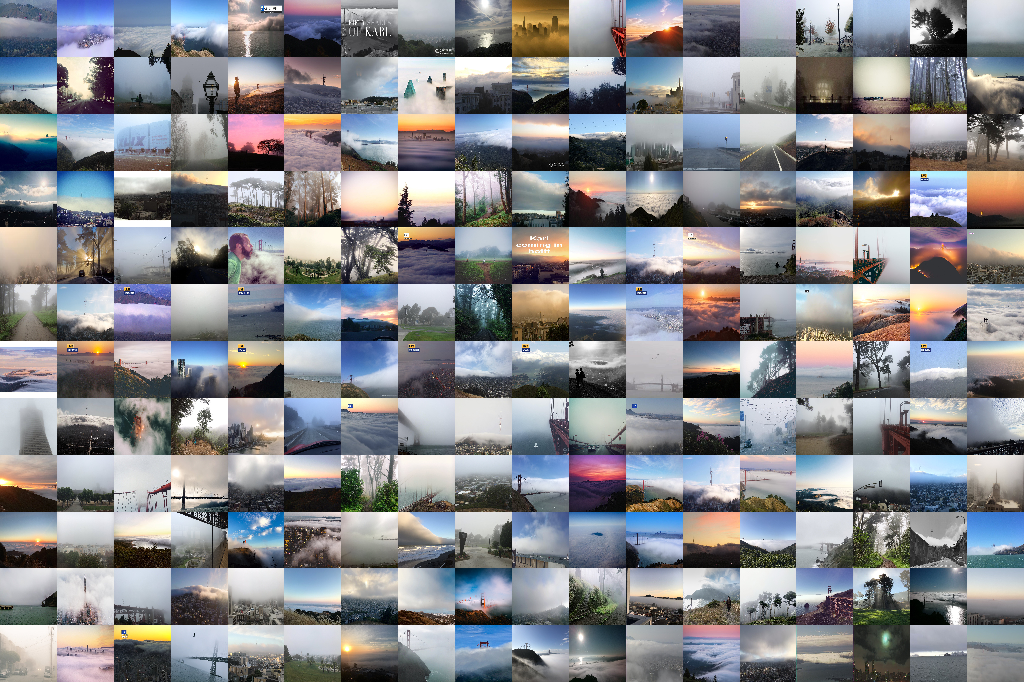

In [146]:
inew.resize((1024,int(1024/1.5)))

In [150]:
inew.resize((750,553)).save('content.jpg')

In [152]:
content_img=inew.resize((750,553))

Style image:
View of Venice, Fog
Pierre-Auguste Renoir
Date: 1881
Style: Impressionism
Period: Rejection of Impressionism
Genre: marina
Media: oil, canvas
Location: Kreeger Museum, Washington, DC, US

https://www.wikiart.org/en/pierre-auguste-renoir/view-of-venice-fog-1881

In [151]:
style_img=Image.open(os.path.join(os.getcwd(),'style_venice.jpg'))
print(style_img.size)
style_img

(750, 553)


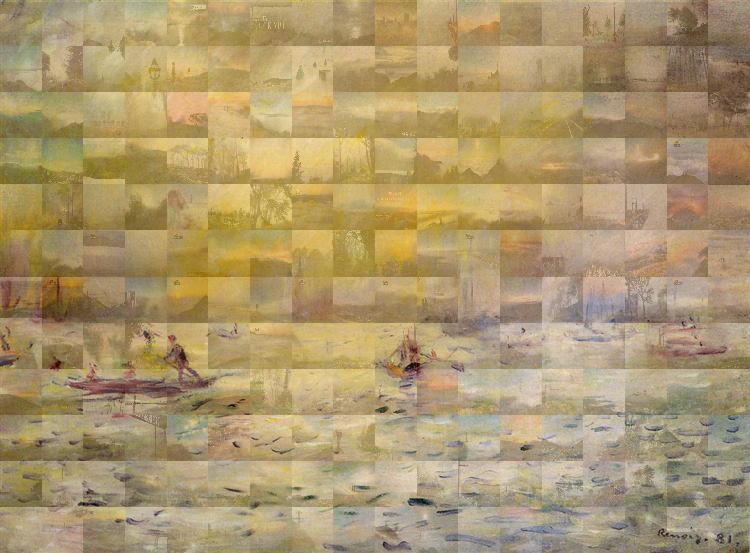

In [165]:
# Make sure images got an alpha channel
image5 = content_img.convert("RGBA")
image6 = style_img.convert("RGBA")

# alpha-blend the images with varying values of alpha
alphaBlended = Image.blend( image6,image5, alpha=.25)
alphaBlended


In [129]:
style_img=Image.open(os.path.join(os.getcwd(),'style_1.jpg'))
print(style_img.size)
content_img=Image.open(os.path.join(os.getcwd(),'content.jpg'))
print(content_img.size)
content_img

# Make sure images got an alpha channel
image5 = content_img.convert("RGBA")
image6 = style_img.convert("RGBA")

# alpha-blend the images with varying values of alpha
alphaBlended = Image.blend( image6,image5, alpha=.25)
alphaBlended.save('Blended_Karl.png')
alphaBlended

(750, 553)
(750, 553)


(750, 553)


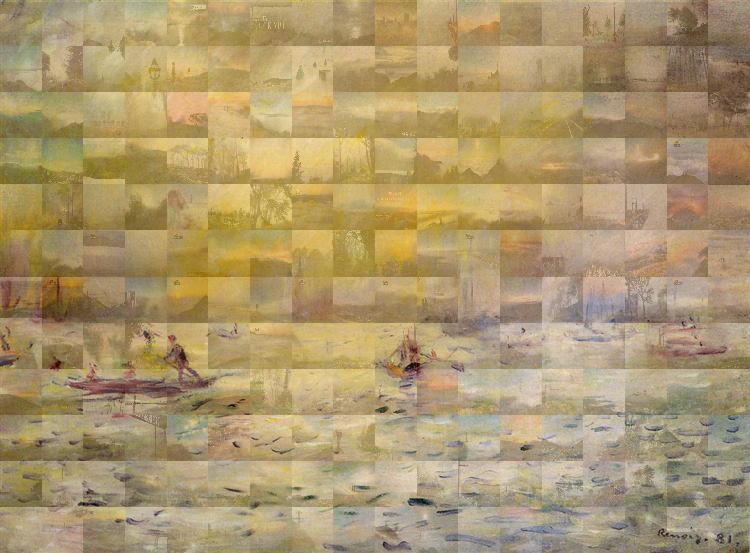

In [10]:
from PIL import Image, ImageDraw
blend_img=Image.open(os.path.join(os.getcwd(),'Blended_final.jpg'))
print(style_img.size)
blend_img

http://scikit-image.org/docs/dev/auto_examples/transform/plot_swirl.html

C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\skimage\transform\_warps.py:412: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '


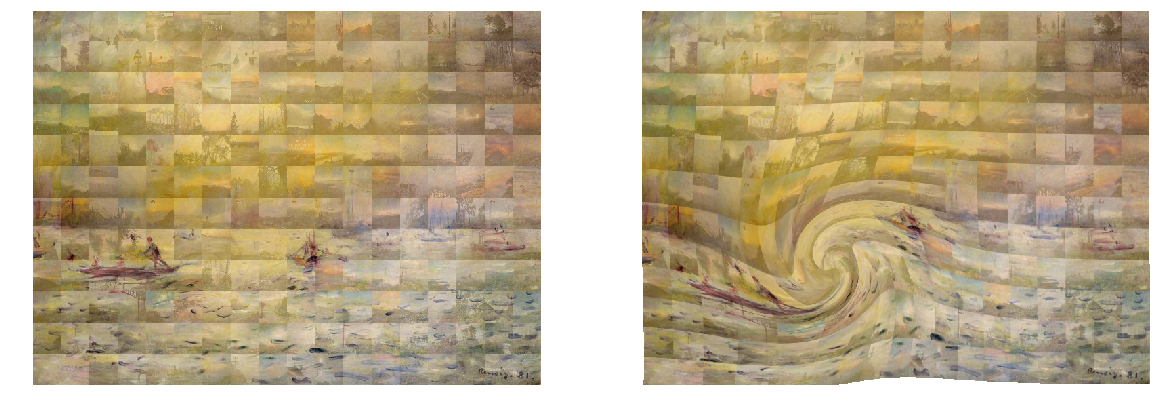

In [110]:
from skimage.transform import swirl


image = np.asarray(blend_img)
swirled = swirl(image, rotation=0, strength=4, radius=400)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray, interpolation='none')
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray, interpolation='none')
ax1.axis('off')

plt.show()

# Download the shp files from the following link:
https://geodata.lib.berkeley.edu/catalog?f%5Bdc_format_s%5D%5B%5D=Shapefile&f%5Bdct_spatial_sm%5D%5B%5D=San+Francisco+Bay+Area+%28Calif.%29&f%5Bdct_spatial_sm%5D%5B%5D=San+Francisco+County+%28Calif.%29&sort=solr_year_i+desc%2C+dc_title_sort+asc&bbox=-122.717285%2037.386526%20-122.071838%2037.90845


In [4]:
os.listdir(os.path.join(os.getcwd(),'data'))

['bayarea_county.dbf',
 'bayarea_county.prj',
 'bayarea_county.shp',
 'bayarea_county.shp.xml',
 'bayarea_county.shx']

In [3]:
!pip install pyshp

  Running setup.py bdist_wheel for pyshp: started
  Running setup.py bdist_wheel for pyshp: finished with status 'done'
  Stored in directory: C:\Users\vinay\AppData\Local\pip\Cache\wheels\cc\e8\7c\f00fc95ae2a16ed41be9defdd647213a334fd12e03b1452c26
Successfully built pyshp


In [1]:
import shapefile as shp
bay_shp=shp.Reader(os.path.join(os.path.join(os.getcwd(),'data'),'bayarea_county.shp'))
type(bay_shp)

shapefile.Reader

In [62]:
# Source: https://stackoverflow.com/questions/23020659/fastest-way-to-calculate-the-centroid-of-a-set-of-coordinate-tuples-in-python-wi
def centroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length


Text(0.5,1,'Screen co-ordinates')

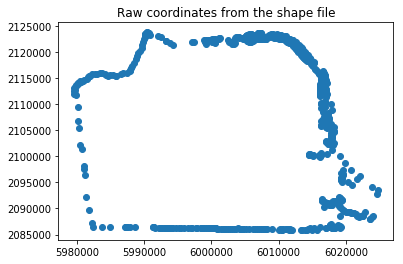

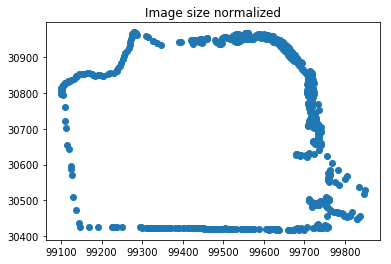

In [93]:
feature = bay_shp.shapeRecords()[4]
first = feature.shape.__geo_interface__  
geo_coord=np.array(first['coordinates'][0][0])
%matplotlib inline
plt.scatter(geo_coord[:,0],geo_coord[:,1])
plt.title('Raw coordinates from the shape file')

range_x=max(geo_coord[:,0])-min(geo_coord[:,0])
range_y=max(geo_coord[:,1])-min(geo_coord[:,1])
geo_coord[:,0]=geo_coord[:,0]*blend_img.size[0]/range_x
geo_coord[:,1]=geo_coord[:,1]*blend_img.size[1]/range_y
plt.figure()
plt.scatter(geo_coord[:,0],geo_coord[:,1])
plt.title('Image size normalized')

# Move the origin to the center
centrod_poly=centroidnp(geo_coord)
geo_coord[:,0]=(geo_coord[:,0]-np.median(geo_coord[:,0]))
geo_coord[:,1]=(geo_coord[:,1]-np.median(geo_coord[:,1]))
plt.figure()
plt.scatter(geo_coord[:,0],geo_coord[:,1])
plt.title('Centroid corrected')

screen_width=blend_img.size[1]
screen_height=blend_img.size[0]
im_coord=geo_coord.copy()
zoom_factor=1
im_coord[:,0]=zoom_factor*geo_coord[:,0]+screen_width/2
im_coord[:,0]=im_coord[:,0]+np.abs(min(im_coord[:,0]))
im_coord[:,1] = screen_height/2 - geo_coord[:,1]*zoom_factor
im_coord[:,1]=im_coord[:,1]-min(im_coord[:,1])
plt.figure()
plt.scatter(im_coord[:,0],im_coord[:,1])
plt.title('Screen co-ordinates')

Change from Cartesian coordinates to screen coordinates:
screenX = cartX + screen_width/2
screenY = screen_height/2 - cartY
Source: https://stackoverflow.com/questions/14880601/translating-between-cartesian-and-screen-coordinates


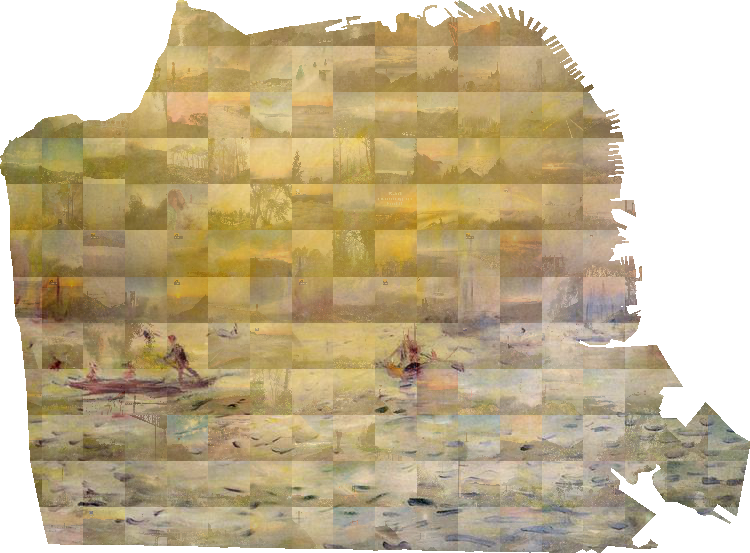

In [113]:


# read image as RGB and add alpha (transparency)
im = Image.open("Blended_final.jpg").convert("RGBA")

# convert to numpy (for convenience)
imArray = np.asarray(im)


# create mask
polygon=[(im_coord[i,0],im_coord[i,1]) for i in range(im_coord.shape[0])]
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("SF_cropped.png")
newIm

In [118]:
image = np.asarray(blend_img)
imArray = 255*swirl(image, rotation=0, strength=4, radius=400)
# create mask
polygon=[(im_coord[i,0],im_coord[i,1]) for i in range(im_coord.shape[0])]
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("SF_cropped_swirled.png")
newIm

C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\skimage\transform\_warps.py:412: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '


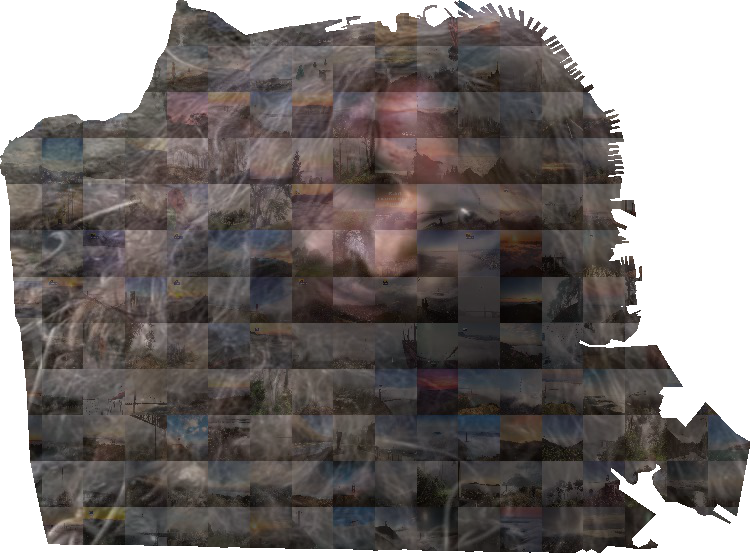

In [130]:

# read image as RGB and add alpha (transparency)
im = Image.open("Blended_Karl.png").convert("RGBA")

# convert to numpy (for convenience)
imArray = np.asarray(im)


# create mask
polygon=[(im_coord[i,0],im_coord[i,1]) for i in range(im_coord.shape[0])]
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("SF_cropped_2.png")
newIm